In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse as sp_sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [258]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/gdrive/My Drive/project/50000.csv',encoding='ISO-8859-1')
# data['tags'] = data['tags'].apply(literal_eval)
# x = data.nutrition
x = data.drop(["name","id","contributor_id","nutrition","submitted","steps","tags","description","ingredients"],axis = 1)
y = data['low-fat']


In [259]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert each category in the label to an integer
# le = LabelEncoder()
# y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/5,random_state=0)

In [260]:
print(y)
print(y.shape)

0        1
1        1
2        0
3        1
4        0
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: low-fat, Length: 50000, dtype: int64
(50000,)


In [261]:
print(y_train)

20330    0
17532    0
45819    0
34807    1
31888    0
        ..
21243    0
45891    0
42613    0
43567    0
2732     0
Name: low-fat, Length: 40000, dtype: int64


In [262]:
print(X_train)

       minutes  healthy  ...  stated_fat  total_carbonhydrate
20330       70        0  ...          29                    6
17532       60        1  ...           6                   13
45819       50        0  ...           0                    5
34807      130        1  ...           0                    5
31888       25        0  ...          12                    3
...        ...      ...  ...         ...                  ...
21243       10        1  ...          29                    9
45891       10        0  ...           0                    1
42613       20        0  ...           0                    0
43567        1        0  ...           0                    1
2732        20        0  ...          58                   18

[40000 rows x 18 columns]


 **K-NN**

In [264]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,21): # Declare an of the KNN classifier class with the value with neighbors.

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train) # Fit the model with training data and target values
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [265]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [266]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 86.04 % and k = [5]


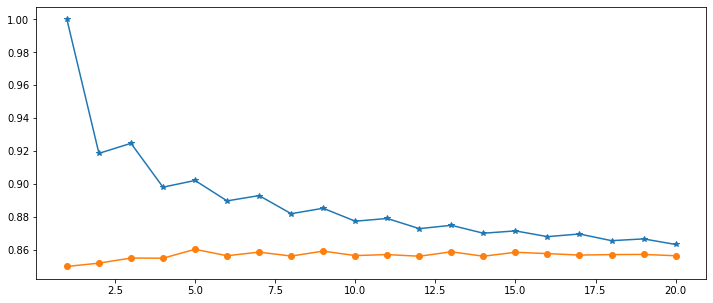

In [267]:
plt.figure(figsize=(12,5))
plt.plot(range(1,21),train_scores,marker='*',label='Train Score')
plt.plot(range(1,21),test_scores,marker='o',label='Test Score')

In [268]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(5)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8604

In [269]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7776,521,8297
1,875,828,1703
All,8651,1349,10000


In [270]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      8297
           1       0.61      0.49      0.54      1703

    accuracy                           0.86     10000
   macro avg       0.76      0.71      0.73     10000
weighted avg       0.85      0.86      0.85     10000



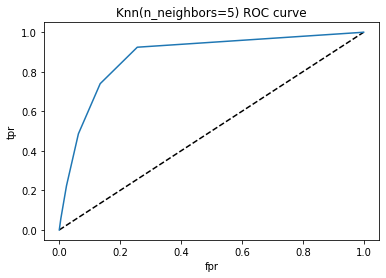

In [271]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [272]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8775057253146914

In [273]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8527249999999998
Best Parameters: {'n_neighbors': 7}


**NAIVE** **BAYES**

In [274]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [275]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

# Training your model 
mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [276]:
# Predicting Outcome 
predicted = mod.predict(X_test)

In [277]:
mod.score(X_test,y_test)

0.9987

In [278]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[8287   10]
 [   3 1700]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8297
           1       0.99      1.00      1.00      1703

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Decision Tree**

In [279]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=8, max_features=10, random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.999


In [280]:
y_pred = dt.predict(X_test)

In [281]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[8297    0]
 [  10 1693]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8297
           1       1.00      0.99      1.00      1703

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**NN**

In [282]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [283]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.40088732
Iteration 2, loss = 0.07140099
Iteration 3, loss = 0.01374071
Iteration 4, loss = 0.00585380
Iteration 5, loss = 0.00297057
Iteration 6, loss = 0.00189582
Iteration 7, loss = 0.00136054
Iteration 8, loss = 0.00102362
Iteration 9, loss = 0.00078064
Iteration 10, loss = 0.00056291
Iteration 11, loss = 0.00046150
Iteration 12, loss = 0.00035370
Iteration 13, loss = 0.00028475
Iteration 14, loss = 0.00022578
Iteration 15, loss = 0.00019407
Iteration 16, loss = 0.00016475
Iteration 17, loss = 0.00014028
Iteration 18, loss = 0.00012088
Iteration 19, loss = 0.00010652
Iteration 20, loss = 0.00009348
Iteration 21, loss = 0.00008699
Iteration 22, loss = 0.00008117
Iteration 23, loss = 0.00007175
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [284]:
predictions = mlp.predict(X_test)

from sklearn import metrics 
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 1.0
[[8297    0]
 [   0 1703]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8297
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [285]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [286]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

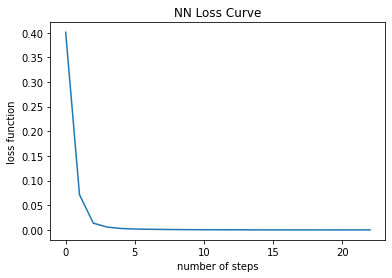

In [287]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [288]:
(mlp.intercepts_[0]).shape

(10,)

In [289]:
(mlp.coefs_[0]).shape

(18, 10)

In [290]:
mlp.intercepts_[0]

array([ 0.78946714,  0.05189336, -0.19142554, -0.37699434,  0.18052337,
       -0.29148625,  1.02671573,  0.08469691,  0.36658246,  0.99716421])

In [291]:
mlp.coefs_[0]

array([[ 0.05324288,  0.5105033 ,  0.11501159,  0.33519126,  0.32586142,
        -0.07683434, -0.02318174,  0.10487945, -0.3269947 , -0.6615807 ],
       [-0.02899489, -0.01639837,  0.36343273,  0.25809872, -0.05666188,
         0.3521356 , -0.24604195,  0.28807258,  0.20183722,  0.48908128],
       [ 0.01087378,  0.49100445, -0.30805061,  0.50636762, -0.07937842,
         0.06384497,  0.07144854,  0.16281352,  0.00159501,  0.17934976],
       [ 0.24131101,  0.12215089,  0.03763327,  0.20322551,  0.19647217,
         0.2451306 , -0.756911  , -0.06997128,  0.32821647,  0.25136595],
       [-0.40051664,  0.10981692, -0.05587833,  0.14384105, -0.10217439,
        -0.18697505,  0.24791673,  0.11603409,  0.06094206,  0.04412522],
       [-0.4486394 ,  0.43655756,  0.253573  , -0.27318498, -0.8288081 ,
         0.60442232, -0.4874039 ,  0.96016101, -0.73801675, -0.03550124],
       [ 0.0479244 , -0.25057412,  0.08590985, -0.34531552,  0.05727769,
        -0.14089741, -0.28075304,  0.25293018

In [294]:
#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.

mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train) 

predictions = mlp.predict(X_test)  

Iteration 1, loss = 0.35918528
Iteration 2, loss = 0.18725920
Iteration 3, loss = 0.11699578
Iteration 4, loss = 0.03826954
Iteration 5, loss = 0.01061491
Iteration 6, loss = 0.00502611
Iteration 7, loss = 0.00293559
Iteration 8, loss = 0.00194705
Iteration 9, loss = 0.00139833
Iteration 10, loss = 0.00104959
Iteration 11, loss = 0.00083306
Iteration 12, loss = 0.00066144
Iteration 13, loss = 0.00054956
Iteration 14, loss = 0.00046743
Iteration 15, loss = 0.00036409
Iteration 16, loss = 0.00026863
Iteration 17, loss = 0.00021000
Iteration 18, loss = 0.00016975
Iteration 19, loss = 0.00014100
Iteration 20, loss = 0.00011980
Iteration 21, loss = 0.00010300
Iteration 22, loss = 0.00008933
Iteration 23, loss = 0.00007814
Iteration 24, loss = 0.00006858
Iteration 25, loss = 0.00006054
Iteration 26, loss = 0.00005371
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [295]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

Accuracy 0.9999
[[8297    0]
 [   1 1702]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8297
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Logistic** **Regression**

In [296]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [297]:
logreg.intercept_.T

array([-4.68549243])

In [298]:
logreg.coef_.T

array([[ 0.02766304],
       [ 0.7988835 ],
       [ 0.37989086],
       [ 0.21786416],
       [ 0.1523665 ],
       [ 2.89245163],
       [ 0.11999536],
       [-0.00508463],
       [ 0.02314616],
       [ 0.02228051],
       [-0.08941364],
       [ 0.01232738],
       [-0.15928186],
       [ 0.03977572],
       [ 0.02120597],
       [ 0.05867216],
       [-0.1691809 ],
       [ 0.04707617]])

In [299]:
print(y_test)

11841    0
19602    1
45519    0
25747    0
42642    0
        ..
25091    0
27853    0
47278    0
37020    0
2217     0
Name: low-fat, Length: 10000, dtype: int64


In [300]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
##before processing data in PCA, we got 0.73 accurancy, from this we can observe the accurancy do not decrease a lot
#we can also normally use the model, and largely reduce caculation by using PCA

[[8296    1]
 [   0 1703]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8297
           1       1.00      1.00      1.00      1703

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [301]:
#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

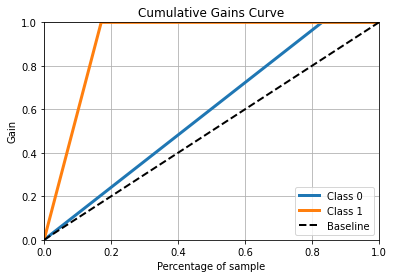

In [302]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

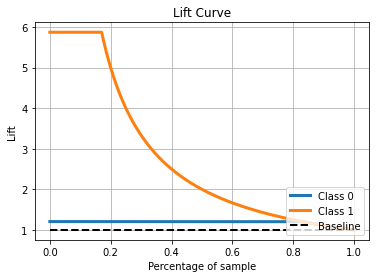

In [303]:
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()